In [108]:
# Imports and load test and training data
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

df_train = pd.read_csv("wildfires_training.csv")
df_test = pd.read_csv("wildfires_test.csv")

print(df_train.head())

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  


In [109]:
y_train = df_train['fire'].map({'no':0,'yes':1}).to_numpy()
X_train = df_train.drop('fire', axis=1).to_numpy()
y_test = df_test['fire'].map({'no':0,'yes':1}).to_numpy()
X_test = df_test.drop('fire', axis=1).to_numpy()
#Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
# rbf kernel svm for multiple features
svm_rbf_default = SVC(kernel='rbf')
svm_rbf_default.fit(X_train_scaled, y_train)
y_train_pred_def = svm_rbf_default.predict(X_train_scaled)
y_test_pred_def = svm_rbf_default.predict(X_test_scaled)

In [111]:
print("Default RBF SVM:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_def))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_def))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_def))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_def))
print("Training Recall:", recall_score(y_train, y_train_pred_def))
print("Test Recall:", recall_score(y_test, y_test_pred_def))
print("Training Precision:", precision_score(y_train, y_train_pred_def))
print("Test Precision:", precision_score(y_test, y_test_pred_def))


Default RBF SVM:
Training Accuracy: 0.935064935064935
Test Accuracy: 0.8
Training Confusion Matrix:
 [[70  5]
 [ 5 74]]
Test Confusion Matrix:
 [[18  4]
 [ 6 22]]
Training Recall: 0.9367088607594937
Test Recall: 0.7857142857142857
Training Precision: 0.9367088607594937
Test Precision: 0.8461538461538461


In [112]:
# Loop over C and gamma values to find best test accuracy
best_test_acc = 0
best_C = None
best_gamma = None

C_values = [0.5, 1, 5, 10, 15]
gamma_values = [0.01, 0.05, 0.1, 0.2, 0.3]

for C_val in C_values:
    for gamma_val in gamma_values:
        svm = SVC(kernel='rbf', C=C_val, gamma=gamma_val)
        svm.fit(X_train_scaled, y_train)
        y_test_pred = svm.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_test_pred)
        print(f"C Value={C_val}, Gamma Value={gamma_val} -> Test Accuracy={acc:.3f}")
        if acc > best_test_acc:
            best_test_acc = acc
            best_C = C_val
            best_gamma = gamma_val

print(f"\nCalculated most accurate values: C Value={best_C}, Gamma Value={best_gamma}, Test Accuracy={best_test_acc:.3f}")



C Value=0.5, Gamma Value=0.01 -> Test Accuracy=0.740
C Value=0.5, Gamma Value=0.05 -> Test Accuracy=0.800
C Value=0.5, Gamma Value=0.1 -> Test Accuracy=0.800
C Value=0.5, Gamma Value=0.2 -> Test Accuracy=0.800
C Value=0.5, Gamma Value=0.3 -> Test Accuracy=0.800
C Value=1, Gamma Value=0.01 -> Test Accuracy=0.740
C Value=1, Gamma Value=0.05 -> Test Accuracy=0.800
C Value=1, Gamma Value=0.1 -> Test Accuracy=0.800
C Value=1, Gamma Value=0.2 -> Test Accuracy=0.820
C Value=1, Gamma Value=0.3 -> Test Accuracy=0.800
C Value=5, Gamma Value=0.01 -> Test Accuracy=0.820
C Value=5, Gamma Value=0.05 -> Test Accuracy=0.780
C Value=5, Gamma Value=0.1 -> Test Accuracy=0.760
C Value=5, Gamma Value=0.2 -> Test Accuracy=0.740
C Value=5, Gamma Value=0.3 -> Test Accuracy=0.760
C Value=10, Gamma Value=0.01 -> Test Accuracy=0.820
C Value=10, Gamma Value=0.05 -> Test Accuracy=0.740
C Value=10, Gamma Value=0.1 -> Test Accuracy=0.740
C Value=10, Gamma Value=0.2 -> Test Accuracy=0.700
C Value=10, Gamma Value=0.3 

In [113]:
svm_rbf_tuned = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
svm_rbf_tuned.fit(X_train_scaled, y_train)

y_train_pred_tuned = svm_rbf_tuned.predict(X_train_scaled)
y_test_pred_tuned = svm_rbf_tuned.predict(X_test_scaled)

print(f"Tuned RBF SVM trained with C={best_C}, gamma={best_gamma}")


Tuned RBF SVM trained with C=1, gamma=0.2


In [114]:
print("Tuned RBF SVM:")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_tuned))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_tuned))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_tuned))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_tuned))
print("Train Recall:", recall_score(y_train, y_train_pred_tuned))
print("Test Recall:", recall_score(y_test, y_test_pred_tuned))
print("Train Precision:", precision_score(y_train, y_train_pred_tuned))
print("Test Precision:", precision_score(y_test, y_test_pred_tuned))


Tuned RBF SVM:
Train Accuracy: 0.9285714285714286
Test Accuracy: 0.82
Train Confusion Matrix:
 [[69  6]
 [ 5 74]]
Test Confusion Matrix:
 [[18  4]
 [ 5 23]]
Train Recall: 0.9367088607594937
Test Recall: 0.8214285714285714
Train Precision: 0.925
Test Precision: 0.8518518518518519


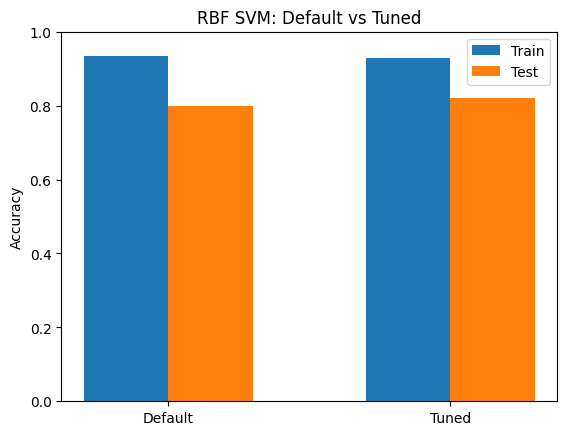

In [115]:
# Plot comparison of default vs tuned with training and test data

methods = ['Default','Tuned']
train_acc = [accuracy_score(y_train, y_train_pred_def), accuracy_score(y_train, y_train_pred_tuned)]
test_acc = [accuracy_score(y_test, y_test_pred_def), accuracy_score(y_test, y_test_pred_tuned)]

x = [0,1]
plt.bar([i-0.15 for i in x], train_acc, 0.3, label='Train')
plt.bar([i+0.15 for i in x], test_acc, 0.3, label='Test')
plt.xticks(x, methods)
plt.ylabel('Accuracy')
plt.title('RBF SVM: Default vs Tuned')
plt.ylim(0,1)
plt.legend()
plt.show()

